In [1]:
import rasterio
import numpy as np
from affine import Affine
from pyproj import Proj, transform
import pyproj
# import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import h5py
# import pyhdf
# from pyhdf.SD import SD, SDC
# import re
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from PIL import Image
import scipy.stats as stats
import numpy.ma as ma

In [3]:
qa_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_120059_20131014_20200913_02_T1_QA_PIXEL.TIF')



In [4]:
# Define red, nir, and swir bands
red_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_120059_20131014_20200913_02_T1_SR_B4.TIF')
nir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_120059_20131014_20200913_02_T1_SR_B5.TIF')
swir_im = Image.open('/Users/nikaankoupaei/Downloads/LC08_L2SP_120059_20131014_20200913_02_T1_SR_B7.TIF')



In [5]:
# convert to pandas dataframe
red = pd.DataFrame(np.array(red_im))
nir = pd.DataFrame(np.array(nir_im))
swir = pd.DataFrame(np.array(swir_im))

In [5]:
# convert fill value to nans
red=red.replace(0,np.nan)
nir=nir.replace(0,np.nan)
swir=swir.replace(0,np.nan)

In [6]:
# filter through only valid values and replace non-valid values with nans 
mask_red = (red >= 7273) & (red <= 43636) 
mask_nir = (nir >= 7273) & (nir <= 43636)
mask_swir = (swir >= 7273) & (swir <= 43636)

red = red[mask_red]
nir = nir[mask_nir]
swir = swir[mask_swir]

In [7]:
# Multiply by scale factor and add offset
red = (0.0000275*red) - 0.2
nir = (0.0000275*nir) - 0.2
swir = (0.0000275*swir) - 0.2

In [8]:
# DELETE IF NEEDED

red = np.asarray(red)
nir = np.asarray(nir)
swir = np.asarray(swir)

In [9]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# # rows

# red_arr1 = np.delete(red,slice(5000,9999999),0)
# nir_arr1 = np.delete(nir,slice(5000,9999999),0)
# swir_arr1 = np.delete(swir,slice(5000,9999999),0)

# # # columns

# red_arr = np.delete(red_arr1,slice(5000,9999999),1)
# nir_arr = np.delete(nir_arr1,slice(5000,9999999),1)
# swir_arr = np.delete(swir_arr1,slice(5000,9999999),1)


In [10]:
red = red[3200:4200,700:1700]
nir = nir[3200:4200,700:1700]
swir = swir[3200:4200,700:1700]

In [11]:
# check if shape is same for all
print(red.shape)
print(nir.shape)
print(swir.shape)

(1000, 1000)
(1000, 1000)
(1000, 1000)


In [12]:
# Calculate NDVI and assign to variable
ndvi=(nir-red)/(nir+red)

In [13]:
# Delete
ndvi_arr = np.asarray(ndvi) 


In [14]:
# filter ndvi values
ndvi_arr[ndvi_arr < 0] = np.nan
ndvi_arr[ndvi_arr > 1] = np.nan 

In [15]:
ndvi = pd.DataFrame(ndvi_arr)

In [16]:
# convert swir back to array
swir = np.asarray(swir)

In [17]:
# filter swir values
swir[swir < 0.01] = np.nan
swir[swir > 100] = np.nan

In [18]:
swir = pd.DataFrame(swir)

In [19]:
# Calculate STR and assign to variable
str0=((1-swir)**2)/(2*swir)

In [20]:
# ndvi.to_excel('/Users/nikaankoupaei/Downloads/ndvi_MA_UNDRAINED_20141204.xlsx')

In [21]:
# str0.to_excel('/Users/nikaankoupaei/Downloads/str0_MA_UNDRAINED_20141204.xlsx')

In [22]:
# THIS IS WHAT TO DO FOR FILTERING SWIR
SWIR=pd.DataFrame(np.asarray(swir).flatten())

In [23]:
SWIR=SWIR.rename(columns={0:'SWIR'})

In [24]:
# END WHAT TO DO FOR FILTERING FOR SWIR

In [25]:
# START WHAT TO DO FOR FILTERING FOR NDVI

In [26]:
NDVI=pd.DataFrame(np.asarray(ndvi).flatten())

In [27]:
NDVI=NDVI.rename(columns={0:'NDVI'})

In [28]:
# (DELETE IF NEEDED)
NDVI['STR'] = ((1-SWIR['SWIR'])**2)/(2*SWIR['SWIR']) 

In [29]:
# MAIN DATAFRAME (DELETE IF NEEDED)
DF = NDVI
DF

,NDVI,STR
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
999995,0.115257,NaN
999996,0.069708,NaN
999997,0.074807,NaN
999998,0.102731,NaN


In [30]:
x_wet=np.linspace(0,1,100)
x_dry=np.linspace(0,1,100)

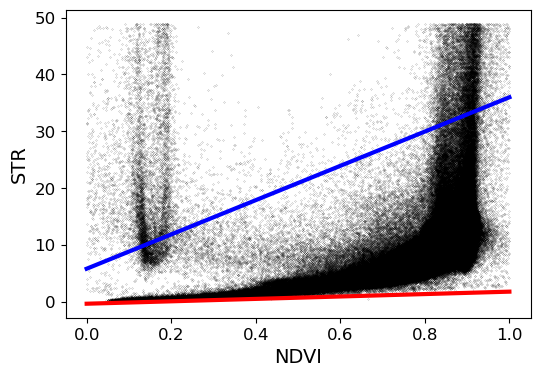

In [31]:
plt.figure(figsize=(6,4))
plt.title('',fontsize=16)
plt.scatter(DF['NDVI'],DF['STR'],color='black',s=0.01)
# plt.ylim(-1,35)
# plt.xlim(0,1)
plt.xlabel('NDVI',fontsize=14)
plt.ylabel('STR',fontsize=14)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
# plt.scatter(DF['NDVI'],str0_max_arr,color='hotpink')
# plt.scatter(DF['NDVI'],str0_min_arr,color='green')
plt.plot(x_wet,(30.134*x_wet+5.856),color='blue',linewidth=3)
plt.plot(x_dry,(2.121*x_dry)-.296,color='red',linewidth=3)

# plt.savefig('/Users/nikaankoupaei/Downloads/STR_NDVI_PANEL4.png',dpi=300,bbox_inches="tight")

In [32]:
# convert to array and flatten ndvi and str
ndvi_flat=np.asarray(ndvi).flatten()
str0_flat=np.asarray(str0).flatten()

In [33]:
# convert both to list
ndvi_list = ndvi_flat.tolist()
str0_list = str0_flat.tolist()

In [34]:
# calculate STR max list (change "before" equation below accordingly)
str_max_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(30.134*ndvi_list[i])+5.856
            str_max_list.append(before)
    else:
        str_max_list.append(np.nan) 

In [35]:
# calculate STR min list (change "before" equation below accordingly)
str_min_list=[]
for i in range(len(ndvi_list)):
    if ((30.134*ndvi_list[i])+5.856) > str0_list[i] and ((2.121*ndvi_list[i])-0.296) < str0_list[i]:
            before=(2.121*ndvi_list[i])-0.296
            str_min_list.append(before)
    else:
        str_min_list.append(np.nan)

In [36]:
str0_max_arr = np.asarray(str_max_list)
str0_min_arr = np.asarray(str_min_list)

In [37]:
str_max = str0_max_arr.reshape((red.shape[0], red.shape[1]))
str_min = str0_min_arr.reshape((red.shape[0], red.shape[1]))

In [38]:
qa_arr = np.asarray(qa_im)

In [39]:
qa_arr_sliced = qa_arr[3200:4200,700:1700]

In [40]:
# DELETE IF NEEDED

# slice the dataframes to obtain only region of interest

# rows

# qa_arr111 = np.delete(qa_arr,slice(5000,9999999),0)

# # columns

# qa_arr_sliced = np.delete(qa_arr111,slice(5000,9999999),1)


In [41]:
qa_arr_sliced.shape

(1000, 1000)

In [42]:
qa = pd.DataFrame(qa_arr_sliced.flatten())

In [43]:
qa.shape

(1000000, 1)

In [44]:
df_qa=qa.rename(columns={0:'QA'})
df_qa

,QA
0,1
1,1
2,1
3,1
4,1
...,...
999995,21824
999996,21824
999997,21824
999998,21824


In [45]:
OPTRAM = (str0 - str_min)/(str_max - str_min)

In [46]:
df_OPTRAM = pd.DataFrame(np.asarray(OPTRAM).flatten())

In [47]:
df_OPTRAM=df_OPTRAM.rename(columns={0:'OPTRAM'})
df_OPTRAM

,OPTRAM
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
999995,NaN
999996,NaN
999997,NaN
999998,NaN


In [48]:
print(df_qa.shape)
print(df_OPTRAM.shape)

(1000000, 1)
(1000000, 1)


In [49]:
df_OPTRAM['QA'] = df_qa['QA']
df_OPTRAM

,OPTRAM,QA
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1
...,...,...
999995,NaN,21824
999996,NaN,21824
999997,NaN,21824
999998,NaN,21824


In [50]:
# Setting all rows that are not clear (i.e. those that have cloudy pixels)

df_clear = df_OPTRAM.where(df_OPTRAM['QA'] == 21824)

In [51]:
df_clear

,OPTRAM,QA
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
999995,NaN,21824.0
999996,NaN,21824.0
999997,NaN,21824.0
999998,NaN,21824.0


In [52]:
OPTRAM_clear_array = np.asarray(df_clear['OPTRAM'])
OPTRAM_clear_array.shape

(1000000,)

In [53]:
OPTRAM_FINAL_CLOUD_MASKED = OPTRAM_clear_array.reshape((1000,1000))
OPTRAM_FINAL_CLOUD_MASKED.shape

(1000, 1000)

In [54]:
pd.DataFrame(OPTRAM_FINAL_CLOUD_MASKED).to_csv('/Users/nikaankoupaei/Downloads/ownCloud/20231222_OPTRAM_FILES_REALIZED_DIDNT_INLCUDE_VALID_RANGE_ENDS_FOR_LANDSAT/MA_UNDRAINED/LANDSAT_8/NEW_FOR_20231222__8_cloud_masked_OPTRAM_20141204_tang_filtered.csv')

